In [15]:
import numpy as np
import pylab
import math
from scipy.stats import *
import matplotlib.pyplot as plt
plt.rc('font', family='Verdana')
import copy
%matplotlib inline

In [5]:
# Модель динамики мнений типа Hegselmann-Krause при начальном профиле x и радиусе доверия eps
# Возвращает вектор предельной конфигурации за и время остановки
def model_Hegselman_Krause (x, eps):
    n = len(x)
    X = copy.copy(x)
    t = 0 
    while(1):
        X = np.vstack((X, np.zeros(n)))
        for i in range (n):
            k = 0
            j = copy.copy(i)
            while j < n and abs(X[t][j]-X[t][i]) < eps:
                X[t+1][i] += X[t][j]
                k += 1
                j += 1
            j = i - 1
            while j >= 0 and abs(X[t][j]-X[t][i]) < eps:
                X[t+1][i] += X[t][j]
                k += 1
                j -= 1
            j = i - 1
            X[t+1][i] /= k
        t+=1
        if np.allclose(X[-1],X[-2]): 
            break; 
    return X[-1], t 

# Модель динамики мнений типа Hegselmann-Krause при начальном профиле x и радиусе доверия eps
# Возвращает массив векторов мненией за любое все время до времени остановки
def model_Hegselman_Krause_2 (x, eps):
    n = len(x)
    X = copy.copy(x)
    t = 0 
    while(1):
        X = np.vstack((X, np.zeros(n)))
        for i in range (n):
            k = 0
            j = copy.copy(i)
            while j < n and abs(X[t][j]-X[t][i]) < eps:
                X[t+1][i] += X[t][j]
                k += 1
                j += 1
            j = i - 1
            while j >= 0 and abs(X[t][j]-X[t][i]) < eps:
                X[t+1][i] += X[t][j]
                k += 1
                j -= 1
            j = i - 1
            X[t+1][i] /= k
        t+=1
        if np.allclose(X[-1],X[-2]):
            break;
    return X, t

# Функция визуализации динамики мнений
def draw(model, n, T, l):
    x_lane = np.arange(T+1)
    for i in range(n):
        y_lane = model.transpose()[i]
        plt.plot(x_lane,y_lane)
    print(y_lane)
    plt.ylim([0, l])
    plt.xlim([0,T])
    plt.xlabel('Время t')
    plt.ylabel('Вектор мнений агентов x(t)')
    plt.show()
    
# Функция получения словаля уникальных значений
def unique(x):
    s = [[x[0], 1]]
    for i in range(1, len(x)):
        if x[i] == s[-1][0]:
            s[-1][1] += 1
        else:           
            s.append([x[i], 1])
    return s

# Функция обработки словаря уникальных значений
def statistic1(s):
    n1 = 0
    n2 = 0
    d = 0
    l = sorted(s.keys())
    for i in s.keys():
        if i == l[0]:
            n1 = int(s[i])
        if i == l[1]:
            n2 = int(s[i])
    d = l[1] - l[0]
    return n1, n2, d

# 
def func1(t):
    return 1 - np.exp(-t)

def imp_func(t, t0):
    s = 0
    for i in t:
        if i <= t0:
            s += 1
        else:
            break
    return(s)

# Функция постоения распредения Эрланга 
def erlang(x, k, stat):
    g = k/np.mean(stat)
    s = np.sum(np.log(np.arange(1,k)))
    log = np.log(g) + (k-1)*(np.log(g*x)) - s - g*x
    return np.exp(log)

In [9]:
# Создание файла, содержащего SIZE начальных векторов мнений n агентов
SIZE = 10000
n = 500
data = np.zeros((SIZE, n-1))
f1_w = open(r'NEW_MODEL_BEGIN.txt','w')
for i in range(SIZE):
    x = sorted(np.random.uniform(0,n,n-1))
    data[i] = x
    for w in x:
        f1_w.write(str(w) + ' ')
    f1_w.write('\n\n')
f1_w.close()

In [6]:
# Считывание файла, содержащего SIZE начальных векторов мнений n агентов
SIZE = 10000
n = 500
f1_r = open(r'NEW_MODEL_BEGIN.txt','r')
data = np.zeros((SIZE, n-1))
i = 0
for line in f1_r:
    l = []
    if line != '\n':
        l.append([float(x) for x in line.split()])
        data[i] = np.array(l[0])
    else:
        i+=1
f1_r.close()

In [10]:
# Создание файла, содержащего SIZE предельных конфигураций модели для n агентов
SIZE = 10000
n = 500
eps = 1.1
data_cluster_m = np.zeros((SIZE, n-1))
f2 = open(r'C:\Users\Андрей\Desktop\Проект\NEW_MODEL_END.txt','w')
for i in range(SIZE):
    data_cluster_m[i] = model_Hegselman_Krause(data[i], eps)[0]
    for w in data_cluster_m[i]:
        f2.write(str(w) + ' ')
    f2.write('\n\n')
f2.close()

In [7]:
# Считывание файла, содержащего SIZE предельных конфигураций модели для n агентов
f2_r = open(r'NEW_MODEL_END.txt','r')
data_cluster = np.zeros((SIZE, n-1))
i = 0
for line in f2_r:
    l = []
    if line != '\n':
        l.append([float(x) for x in line.split()])
        data_cluster[i] = np.array(l[0])
    else:
        i+=1
f2_r.close()

[ 0.48936607  1.32575876  3.76672383  4.17593395  4.28537758  5.49911532
  6.16383764  8.19928848  8.6605978  10.07835223 11.20150408]
[11.20150408 10.63992815  9.53342237  9.53342237]


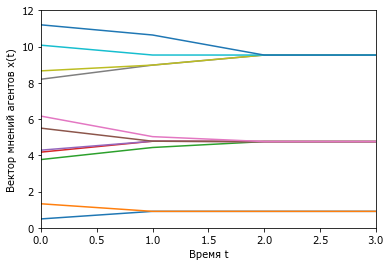

In [60]:
# Пример1 динамики мнений
x_1 = sorted(np.random.random(11)*12)
eps_1 = 2
model = model_Hegselman_Krause_2(x_1, eps_1)
print(model[0][0])
draw(model[0], 11, model[1], 12)

[11.         10.5         9.83333333  9.26041667  9.14739583  8.68590972
  8.5963794   8.5963794 ]


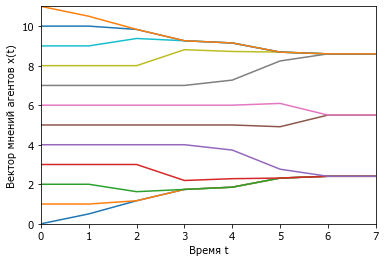

In [59]:
# Пример2 динамики мнений
x_2 = np.arange(12)
eps_2 = 2
model = model_Hegselman_Krause_2(x_2, eps_2)
draw(model[0], 12, model[1],11)

In [11]:
# Сбор статистики
stat_x1 = np.zeros(SIZE)
stat_x2 = np.zeros(SIZE)
stat_dist2 = np.zeros(SIZE)
stat_distn = np.zeros(SIZE)
for i in range(SIZE):
    stat_x1[i] = data[i,0]
    stat_x2[i] = data[i,1]
    stat_dist2[i] = data[i,1] - data[i,0]
    stat_distn[i] = n - data[i,-1]

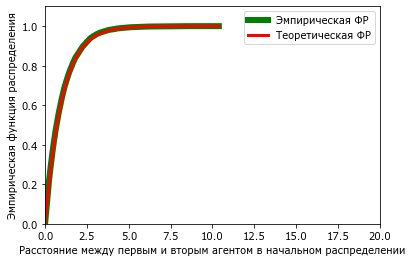

0.8645533634276448


In [16]:
# Построение эмпирической ФР для расстояния между первым и вторым агентом в начальном распределении
x_plot = np.sort(stat_dist2)
y_plot1 = np.zeros(SIZE)
for i in range(SIZE):
    y_plot1[i] = np.sum(x_plot <= x_plot[i])/SIZE
y_plot2 = func1(x_plot)
plt.plot(x_plot, y_plot1, 'g', linewidth = 6)
plt.plot(x_plot, y_plot2, 'r', linewidth = 3)
plt.xlabel('Расстояние между первым и вторым агентом в начальном распределении')
plt.ylabel('Эмпирическая функция распределения')
plt.ylim(0,1.1)
plt.xlim(0,20)
pylab.legend(("Эмпирическая ФР", "Теоретическая ФР"))
plt.show()
print(np.max(abs(y_plot1 - y_plot2))*(SIZE)**0.5)

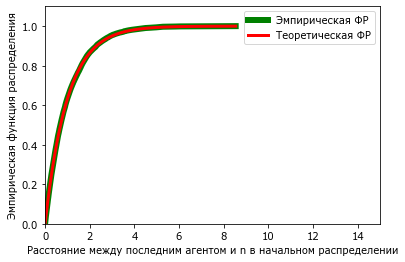

0.729821638685102


In [17]:
# Построение эмпирической ФР для расстояния между последним агентом и n в начальном распределении
x_plot = np.sort(stat_distn)
y_plot1 = np.zeros(SIZE)
for i in range(SIZE):
    y_plot1[i] = np.sum(x_plot <= x_plot[i])/SIZE
y_plot2 = func1(x_plot,n)
plt.plot(x_plot, y_plot1, 'g', linewidth = 6)
plt.plot(x_plot, y_plot2, 'r', linewidth = 3)
plt.xlabel('Расстояние между последним агентом и n в начальном распределении')
plt.ylabel('Эмпирическая функция распределения')
plt.ylim(0,1.1)
plt.xlim(0,15)
pylab.legend(("Эмпирическая ФР", "Теоретическая ФР"))
plt.show()
print(np.max(abs(y_plot1 - y_plot2))*(SIZE)**0.5)

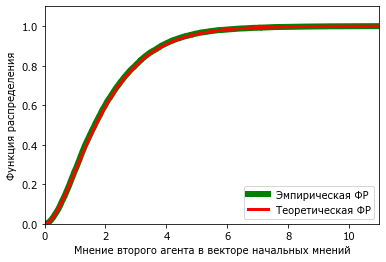

1.4503549511689695


In [27]:
# Построение эмпирической ФР для мнения второго агента в векторе начальных мнений
x_plot = np.sort(stat_x2)
y_plot1 = np.zeros(SIZE)
for i in range(SIZE):
    y_plot1[i] = np.sum(x_plot <= x_plot[i])/SIZE
y_plot2 = 1-np.exp(-x_plot)- x_plot*np.exp(-x_plot)
plt.plot(x_plot, y_plot1, 'g', linewidth = 6)
plt.plot(x_plot, y_plot2, 'r', linewidth = 3)
plt.xlabel('Мнение второго агента в векторе начальных мнений')
plt.ylabel('Функция распределения')
plt.ylim(0,1.1)
plt.xlim(0,11)
pylab.legend(("Эмпирическая ФР", "Теоретическая ФР"))
plt.show()
print(np.max(abs(y_plot1 - y_plot2))*(SIZE)**0.5)

In [61]:
# Сбор статистики
num1_20 = np.zeros(SIZE, dtype = int)
num2_20 = np.zeros(SIZE, dtype = int)
num3_20 = np.zeros(SIZE, dtype = int)
num1_200 = np.zeros(SIZE, dtype = int)
num2_200 = np.zeros(SIZE, dtype = int)
num3_200 = np.zeros(SIZE, dtype = int)
dist1_2_20 = np.zeros(SIZE)
dist2_3_20 = np.zeros(SIZE)
dist1_2_200 = np.zeros(SIZE)
dist2_3_200 = np.zeros(SIZE)

for i in range(SIZE):
    clust = unique(data_cluster[i])
    c = []
    b = []
    for j in range(len(clust)):
        c.append(clust[j][0])
        b.append(clust[j][1])
    l1 = []
    l2 = []
    for j in c:
        if j > 20:
            l1.append(j)
        if j > 200:
            l2.append(j)
    num1_20[i] = b[c.index(l1[0])]
    num2_20[i] = b[c.index(l1[1])]
    num3_20[i] = b[c.index(l1[2])]
    num1_200[i] = b[c.index(l2[0])]
    num2_200[i] = b[c.index(l2[1])]
    num3_200[i] = b[c.index(l2[2])]
    dist1_2_20[i] = l1[1]-l1[0]
    dist2_3_20[i] = l1[2]-l1[1]
    dist1_2_200[i] = l2[1]-l2[0]
    dist2_3_200[i] = l2[2]-l2[1]

Первый кластер после 20
Среднее: 3.0452
Среднеквадратичное: 2.016471413137315
Второй кластер после 20
Среднее: 2.8466
Среднеквадратичное: 1.932994681834381
Третий кластер после 20
Среднее: 2.8462
Среднеквадратичное: 1.9352895287269036


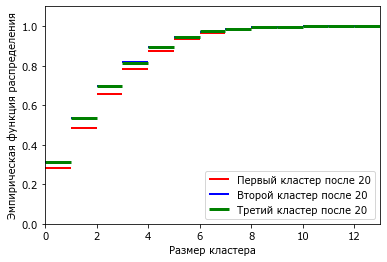

In [132]:
# Построение эмпирических ФР для размеров кластеров
print('Первый кластер после 20')
print('Среднее:', np.mean(num1_20))
print('Среднеквадратичное:', np.std(num1_20))

print('Второй кластер после 20')
print('Среднее:', np.mean(num2_20))
print('Среднеквадратичное:', np.std(num2_20))

print('Третий кластер после 20')
print('Среднее:', np.mean(num3_20))
print('Среднеквадратичное:', np.std(num3_20))

z1_1 = unique(sorted(num1_20))
N1_1 = max(z1_1)[0]
x_plot1_1 = np.arange(N1_1)
y_plot1_1 = np.zeros(N1_1)
for i in range(N1_1):
    sum1_1 = 0
    for j in range(len(z1_1)):
        if i >= z1_1[j][0]: 
            sum1_1 += z1_1[j][1]
    y_plot1_1[i] = sum1_1/SIZE
plt.hlines(y_plot1_1[1:], np.arange(N1_1-1), np.arange(1,N1_1), color = 'r', linewidth = 2)

z2_1 = unique(sorted(num2_20))
N2_1 = max(z2_1)[0]
x_plot2_1 = np.arange(N2_1)
y_plot2_1 = np.zeros(N2_1)
for i in range(N2_1):
    sum2_1 = 0
    for j in range(len(z2_1)):
        if i >= z2_1[j][0]: 
            sum2_1 += z2_1[j][1]
    y_plot2_1[i] = sum2_1/SIZE
plt.hlines(y_plot2_1[1:], np.arange(N2_1-1), np.arange(1,N2_1), color = 'b', linewidth = 2)

z3_1 = unique(sorted(num3_20))
N3_1 = max(z3_1)[0]
x_plot3_1 = np.arange(N3_1)
y_plot3_1 = np.zeros(N3_1)
for i in range(N3_1):
    sum3_1 = 0
    for j in range(len(z3_1)):
        if i >= z3_1[j][0]: 
            sum3_1 += z3_1[j][1]
    y_plot3_1[i] = sum3_1/SIZE
plt.hlines(y_plot3_1[1:], np.arange(N3_1-1), np.arange(1,N3_1), color = 'g', linewidth = 3)

plt.ylim([0,1.1])
plt.xlim([0,min(N1_1, N2_1, N3_1)-1])
plt.xlabel('Размер кластера')
plt.ylabel('Эмпирическая функция распределения')
pylab.legend(("Первый кластер после 20", "Второй кластер после 20", "Третий кластер после 20"), loc = 'lower right')
plt.show()

Первый кластер после 200
Среднее: 3.0388
Среднеквадратичное: 2.028372391845245
Второй кластер после 200
Среднее: 2.8564
Среднеквадратичное: 1.9300722888016397
Третий кластер после 200
Среднее: 2.8163
Среднеквадратичное: 1.9294440416866203


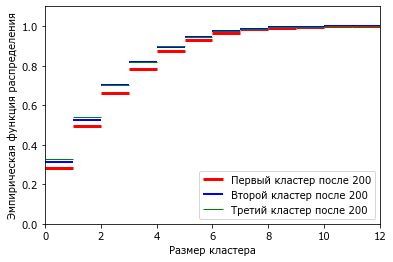

In [133]:
# Построение эмпирических ФР для размеров кластеров
print('Первый кластер после 200')
print('Среднее:', np.mean(num1_200))
print('Среднеквадратичное:', np.std(num1_200))

print('Второй кластер после 200')
print('Среднее:', np.mean(num2_200))
print('Среднеквадратичное:', np.std(num2_200))

print('Третий кластер после 200')
print('Среднее:', np.mean(num3_200))
print('Среднеквадратичное:', np.std(num3_200))

z1_2 = unique(sorted(num1_200))
N1_2 = max(z1_2)[0]
x_plot1_2 = np.arange(N1_2)
y_plot1_2 = np.zeros(N1_2)
for i in range(N1_2):
    sum1_2 = 0
    for j in range(len(z1_2)):
        if i >= z1_2[j][0]: 
            sum1_2 += z1_2[j][1]
    y_plot1_2[i] = sum1_2/SIZE
plt.hlines(y_plot1_2[1:], np.arange(N1_2-1), np.arange(1,N1_2), color = 'r', linewidth = 3)

z2_2 = unique(sorted(num2_200))
N2_2 = max(z2_2)[0]
x_plot2_2 = np.arange(N2_2)
y_plot2_2 = np.zeros(N2_2)
for i in range(N2_2):
    sum2_2 = 0
    for j in range(len(z2_2)):
        if i >= z2_2[j][0]: 
            sum2_2 += z2_2[j][1]
    y_plot2_2[i] = sum2_2/SIZE
plt.hlines(y_plot2_2[1:], np.arange(N2_2-1), np.arange(1,N2_2), color = 'b', linewidth = 2)

z3_2 = unique(sorted(num3_200))
N3_2 = max(z3_2)[0]
x_plot3_2 = np.arange(N3_2)
y_plot3_2 = np.zeros(N3_2)
for i in range(N3_2):
    sum3_2 = 0
    for j in range(len(z3_2)):
        if i >= z3_2[j][0]: 
            sum3_2 += z3_2[j][1]
    y_plot3_2[i] = sum3_2/SIZE
plt.hlines(y_plot3_2[1:], np.arange(N3_2-1), np.arange(1,N3_2), color = 'g', linewidth = 1)

plt.ylim([0,1.1])
plt.xlim([0,min(N1_2, N2_2, N3_2)-1])
plt.xlabel('Размер кластера')
plt.ylabel('Эмпирическая функция распределения')
pylab.legend(("Первый кластер после 200", "Второй кластер после 200", "Третий кластер после 200"), loc = 'lower right')
plt.show()

Расстояние между первым и вторым после 20
Среднее: 2.89490916741729
Среднеквадратичное: 1.1985592556129163
Расстояние между вторым и третьим после 20
Среднее: 2.83585565245673
Среднеквадратичное: 1.1764793388577348


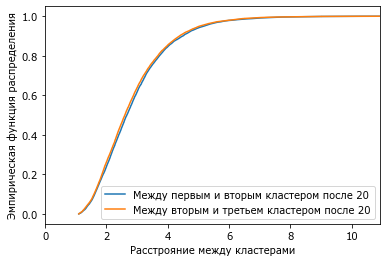

In [154]:
# Построение эмпирических ФР для расстояния между кластеровами
print('Среднее:', np.mean(dist1_2_20))
print('Среднеквадратичное:', np.std(dist1_2_20))

print('Расстояние между вторым и третьим после 20')
print('Среднее:', np.mean(dist2_3_20))
print('Среднеквадратичное:', np.std(dist2_3_20))

plt.plot(sorted(dist1_2_20), np.arange(1, SIZE+1)/SIZE)
plt.plot(sorted(dist2_3_20), np.arange(1, SIZE+1)/SIZE)

plt.xlabel('Расстрояние между кластерами')
plt.ylabel('Эмпирическая функция распределения')
plt.xlim([0, min(np.max(dist1_2_20),np.max(dist2_3_20))])
pylab.legend(("Между первым и вторым кластером после 20", "Между вторым и третьем кластером после 20"), loc = 'lower right')
plt.show()

Расстояние между первым и вторым после 200
Среднее: 2.8819068317704004
Среднеквадратичное: 1.1694727573261388
Расстояние между вторым и третьим после 20
Среднее: 2.8401022834814
Среднеквадратичное: 1.1998121463329436


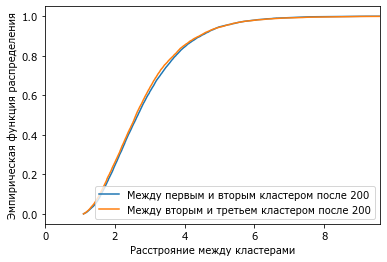

In [155]:
# Построение эмпирических ФР для расстояния между кластеровами
print('Расстояние между первым и вторым после 200')
print('Среднее:', np.mean(dist1_2_200))
print('Среднеквадратичное:', np.std(dist1_2_200))

print('Расстояние между вторым и третьим после 20')
print('Среднее:', np.mean(dist2_3_200))
print('Среднеквадратичное:', np.std(dist2_3_200))

plt.plot(sorted(dist1_2_200), np.arange(1, SIZE+1)/SIZE)
plt.plot(sorted(dist2_3_200), np.arange(1, SIZE+1)/SIZE)

plt.xlabel('Расстрояние между кластерами')
plt.ylabel('Эмпирическая функция распределения')
plt.xlim([0, min(np.max(dist1_2_200),np.max(dist2_3_200))])
pylab.legend(("Между первым и вторым кластером после 200", "Между вторым и третьем кластером после 200"), loc = 'lower right')
plt.show()